In [94]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import importlib
from preseimei import pca
import importlib
import lightkurve as lk
importlib.reload(pca)
from astropy.timeseries import LombScargle

def show_movie_sum(movie, dt = 20, dt2=10):
    for i in range(int(len(movie)/dt)):
        movie_now = np.sum(movie[dt* i: dt*i + dt2], axis=0)
        plt.imshow(np.log10(movie_now ))#, vmin = -5, vmax= np.max(np.log10(movie_now )) )
        plt.show()
        print("%d/%d" % (dt*i, len(movie)))
        
        
apertures = [10, 15, 20, 25]
bin_t = 50
obj_name ="WD_triccs18"
obs_date = "20220111"
band = "g_band"
rp =25
out_dir = "/alps/south/reduced/%s_analyzed/movies/%s/%s/" % (obs_date, obj_name, band)
lc_file = glob.glob(out_dir + "target_and_others_*_lc%d.npz" % rp)[0]
lc_file_proccesed = glob.glob(out_dir + "target_processed*_lc%d.npz" % rp)[0]
gaia_id= lc_file.split("_")[-2]
d_movie = np.load(out_dir + "movie_after_bkgsub_%s.npz" % gaia_id)

In [78]:
n_comp_sub = 3
bin_dt = 15
data = np.load(lc_file_proccesed )
data_other = np.load(lc_file )
time = data["time"]
gaia_for_comp= data_other["gaia_for_comp"]
flux_target_pca = data["lc_pca"][n_comp_sub-1]
lc_all = data_other["flux_for_comp"]
flux_target= data_other["flux_target"]

lc_target = lk.LightCurve(data=None, time=time, flux= flux_target_pca, flux_err=None)
lc_bin_target = lc_target.bin(bin_dt)    
    
print(data.files)
print(data_other.files)

['time', 'lc_least_var', 'lc_pca', 'all_after_pca', 'svd_comp']
['time', 'flux_target', 'flux_for_comp', 'gaia_for_comp']


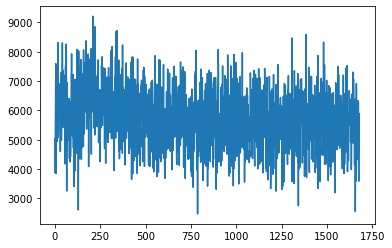

In [79]:
plt.plot(flux_target)

star 0 (3251246232543963392)
516.5390525060691


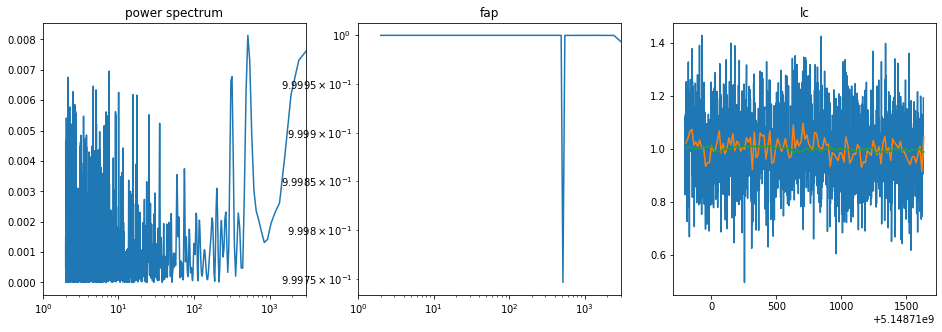

star 1 (3251292824349197568)
547.3759620959531


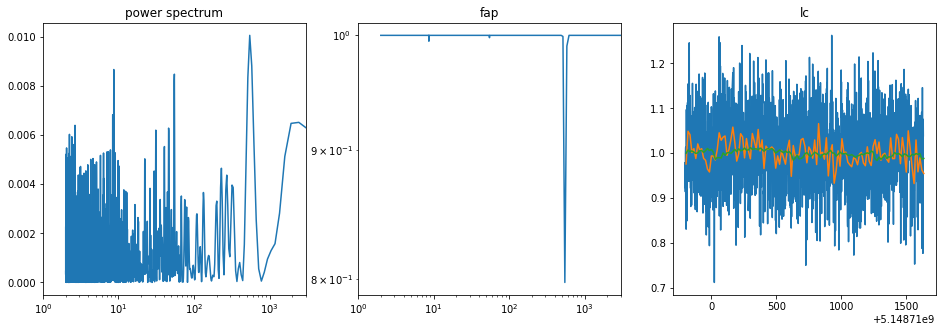

star 2 (3251243483764899072)
1930.023997838472


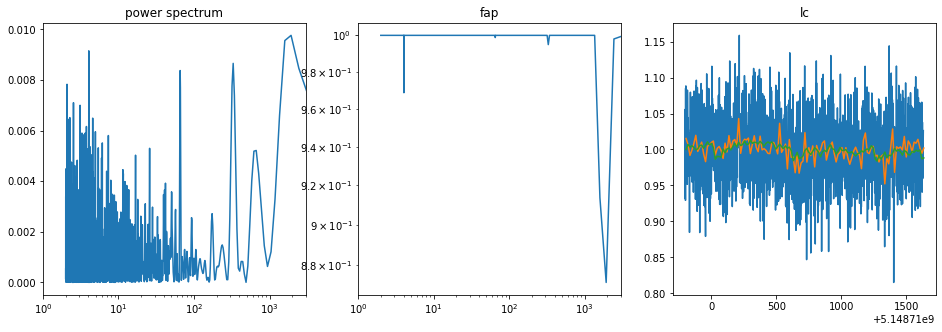

star 3 (3251291209441496832)
3.134939657207137


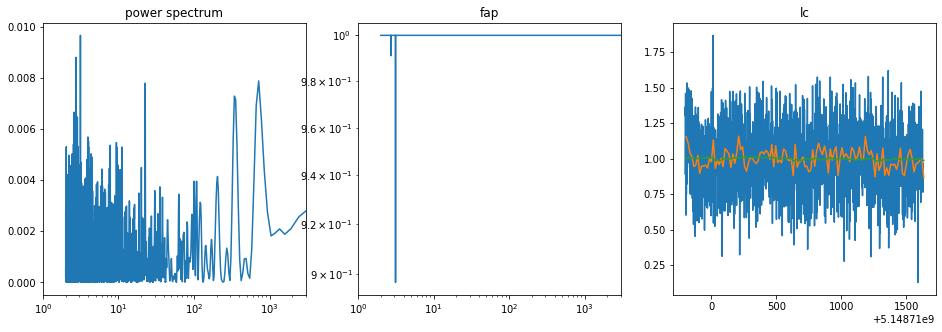

star 4 (3251244858154433536)
3333.3333333333335


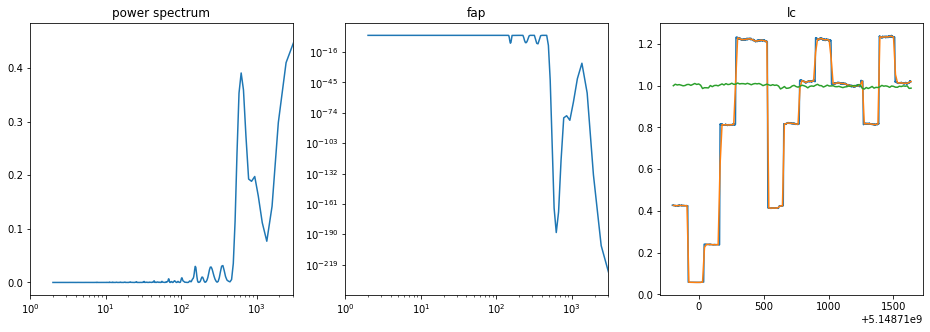

star 5 (3251293889501078016)
3333.3333333333335


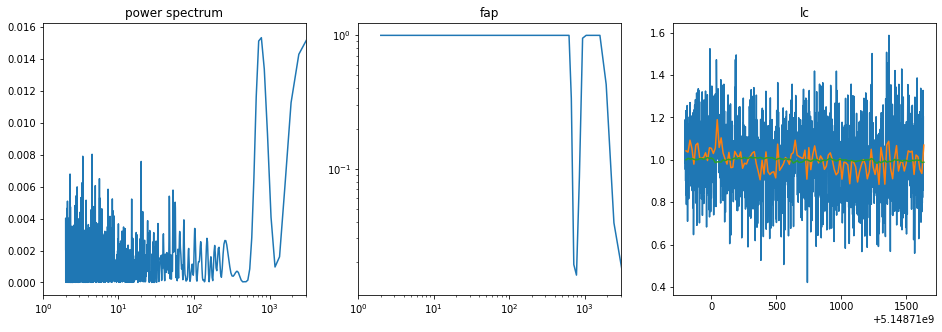

star 6 (3251292927428410752)
3333.3333333333335


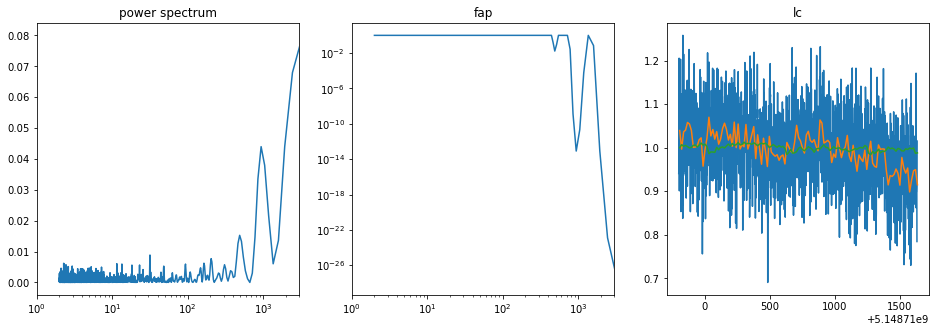

star 7 (3251245407910243328)
5.3130020524907495


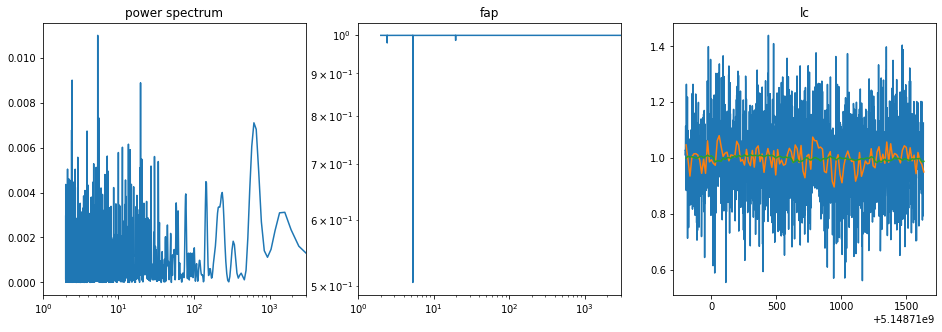

star 8 (3251293099227103616)
3333.3333333333335


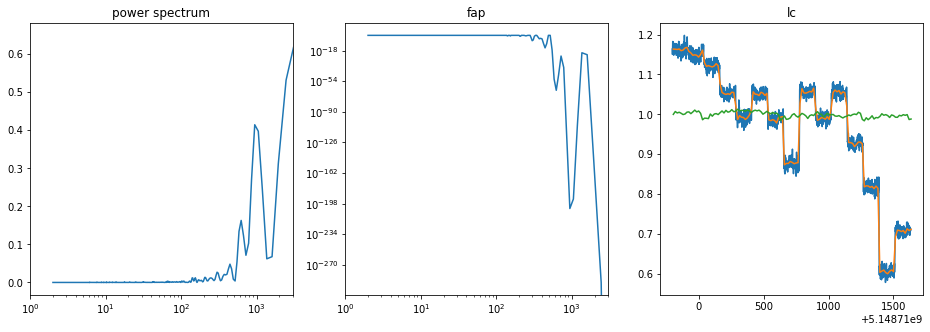

star 9 (3251245339190766848)
3333.3333333333335


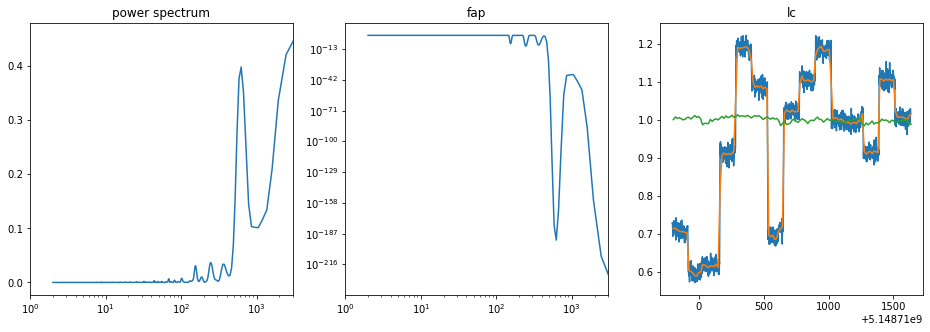

star 10 (3251293889501077888)
2444.604430722145


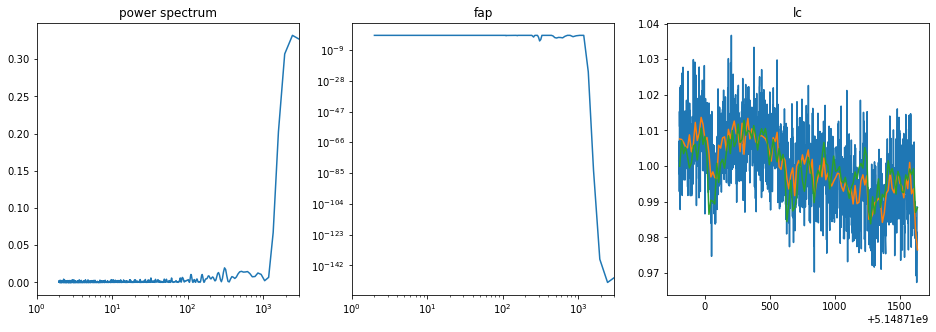

star 11 (3251246129464750592)
3333.3333333333335


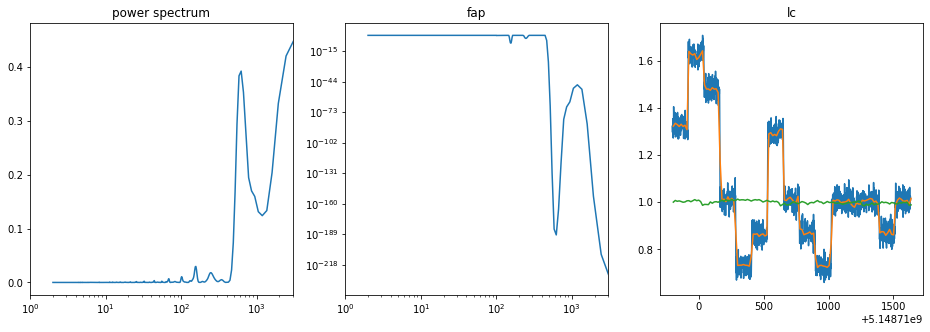

star 12 (3251293889501078144)
2444.604430722145


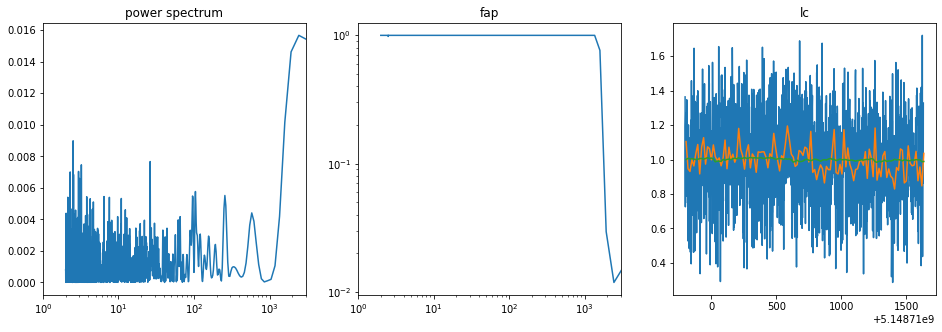

star 13 (3251246026385536000)
3333.3333333333335


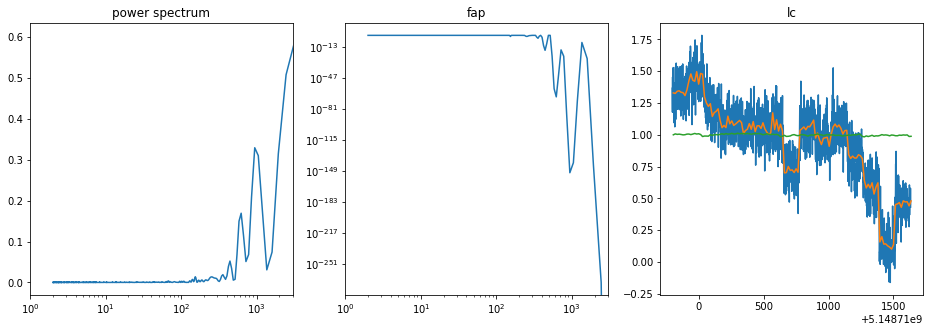

star 14 (3251245098672600320)
621.5930348381125


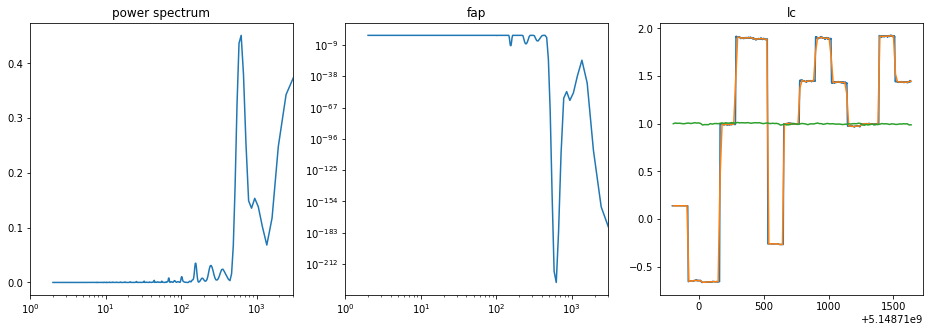

star 15 (3251293717702387328)
3333.3333333333335


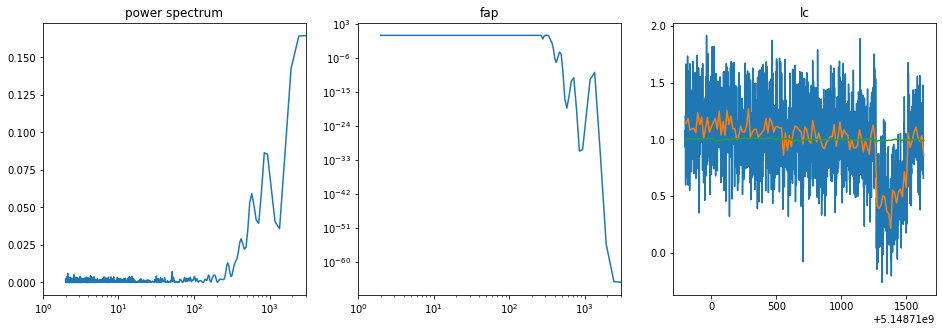

star 16 (3251291140722022016)
780.2885220692466


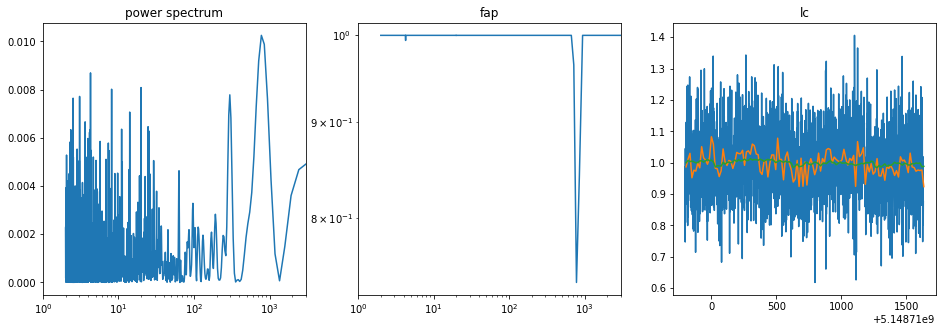

star 17 (3251246301263443584)
3333.3333333333335


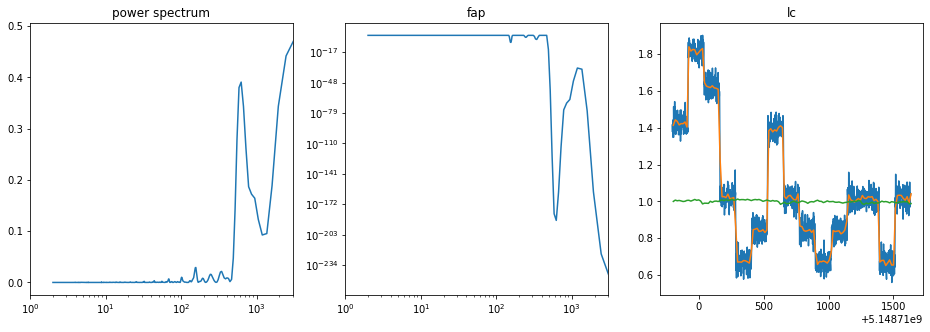

star 18 (3251293885205166336)
8.547108933915679


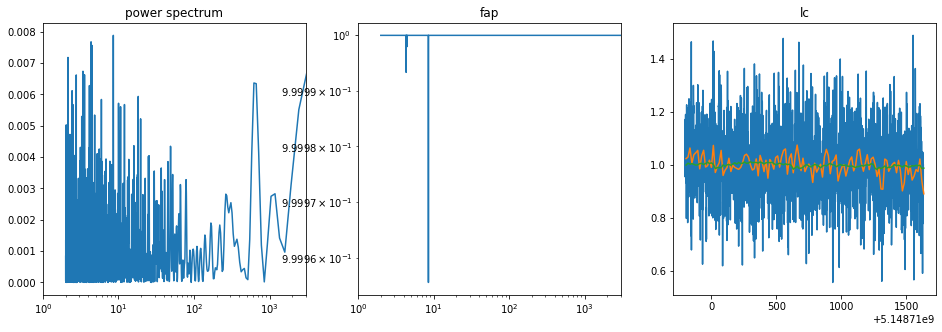

star 19 (3251291690477832704)
5.0635998677057845


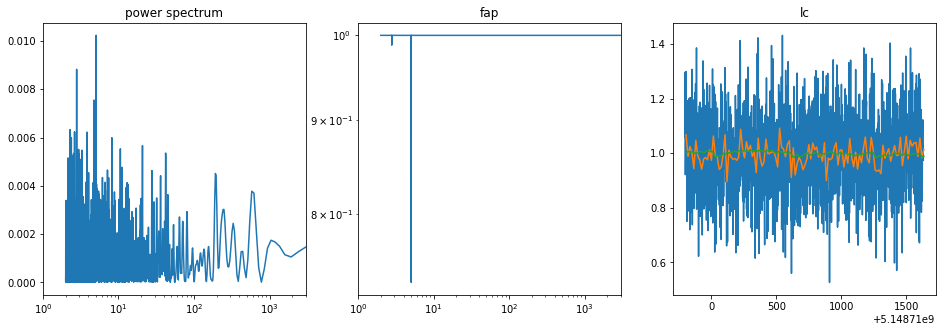

star 20 (3251291965355740032)
3333.3333333333335


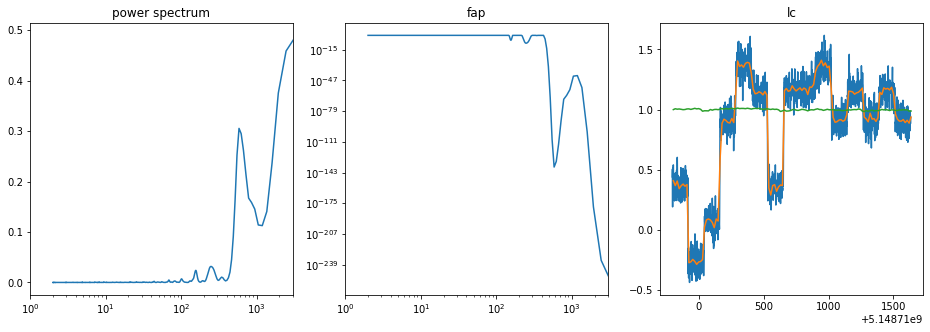

star 21 (3251246919738727808)
15.706905825335689


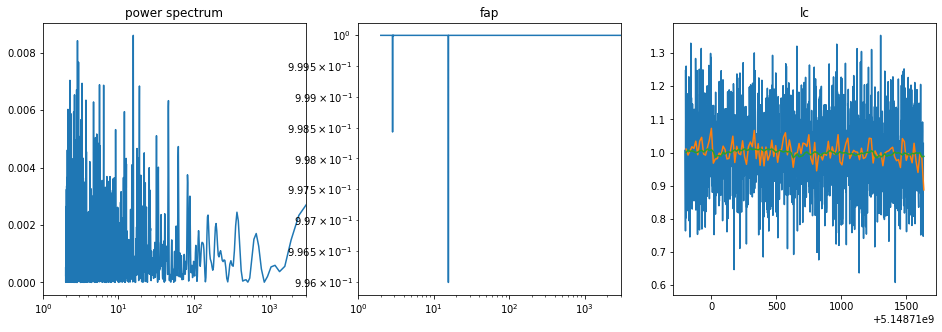

star 22 (3251291656118168960)
582.1285019004594


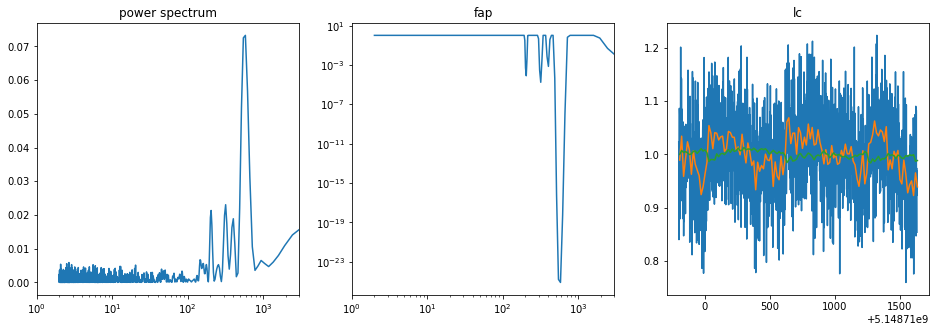

star 23 (3251246644860820992)
2444.604430722145


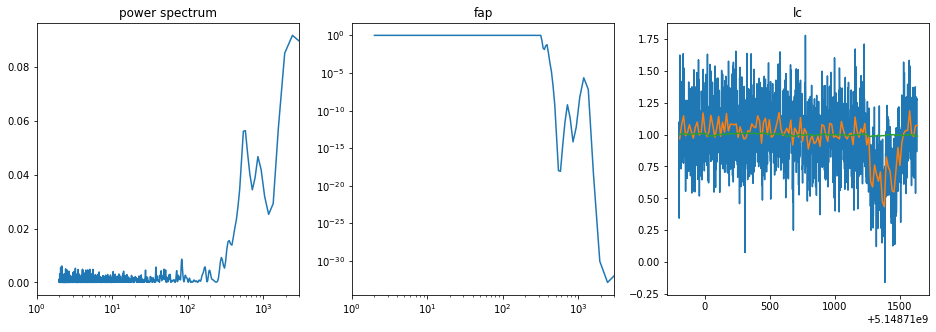

star 24 (3251291072002616832)
3333.3333333333335


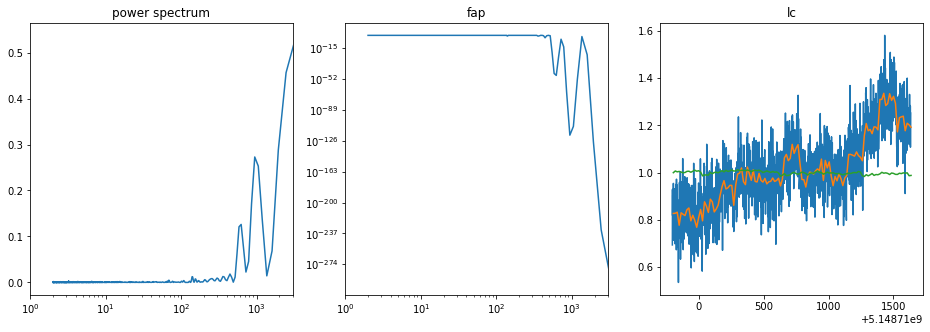

star 25 (3251245339190767104)
12.164389607911767


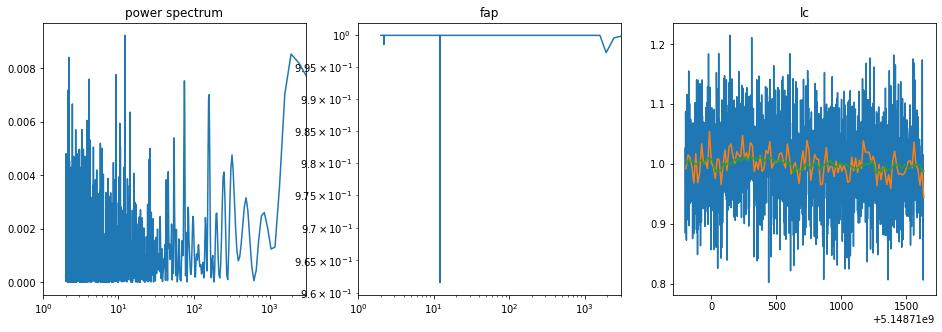

star 26 (3251243689923329536)
3.1221298275522344


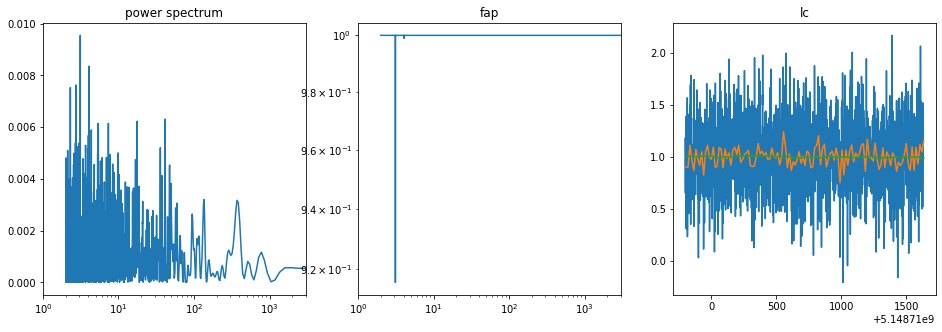

In [68]:
all_after_pca = data["all_after_pca"]
n_pca = 2
all_after_pca_now = all_after_pca[n_pca]
for i in range(len(all_after_pca_now)):
    print("star %d (%s)" % (i, gaia_for_comp[0,i] ))

    fig, axes = plt.subplots(1, 3, figsize = (16, 5))
    time_now = time
    flux_now = lc_all [i]
    flux_now = flux_now/np.median(flux_now)
    ls = LombScargle(time_now, flux_now, np.std( flux_now)) 
    freq, power = ls.autopower(maximum_frequency=0.5,minimum_frequency=0.0003)
    period_now = 1/freq[np.argmax(power)]
    
    lc = lk.LightCurve(data=None, time=time_now, flux=  flux_now, flux_err=None)
    lc_bin = lc.bin(bin_dt)    
    
    print(period_now)
    axes[0].plot(1/freq, power)
    axes[0].set_title("power spectrum")
    axes[0].set_xscale("log")
    axes[0].set_xlim(1, 3000)
    fap = ls.false_alarm_probability(power)
    axes [1].plot(1/freq, fap)
    axes[1].set_xscale("log")
    axes[1].set_yscale("log")
    axes[1].set_xlim(1, 3000)
    axes[1].set_title("fap")
    axes[2].plot(time_now, flux_now)
    axes[2].plot(lc_bin.time.value, lc_bin.flux.value)
    axes[2].plot(lc_bin_target.time.value, lc_bin_target.flux.value)
    axes[2].set_title("lc")
    plt.show()
    

<ipython-input-35-2c54ee4ecb79>:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(image_stack))


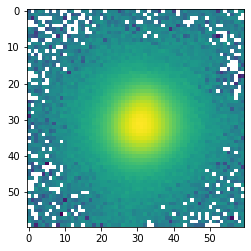

In [35]:
d_movie = np.load(out_dir + "movie_after_bkgsub_%s.npz" % gaia_id)
image_stack = np.sum(movie, axis=0)
plt.imshow(np.log10(image_stack))


<ipython-input-77-20525ef7eb32>:14: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(movie_now ))#, vmin = -5, vmax= np.max(np.log10(movie_now )) )


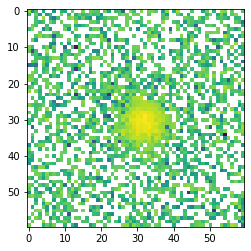

0/1680


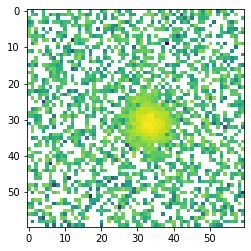

20/1680


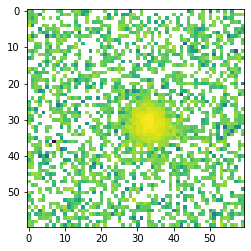

40/1680


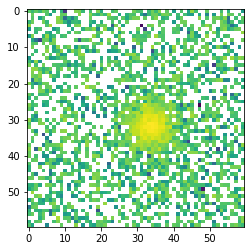

60/1680


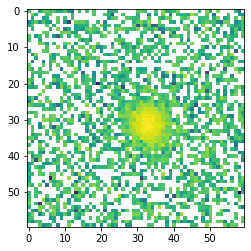

80/1680


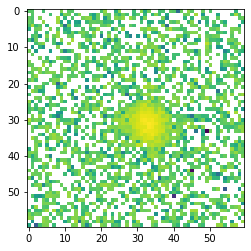

100/1680


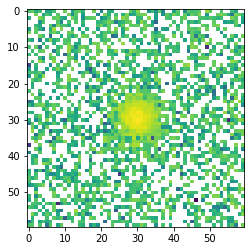

120/1680


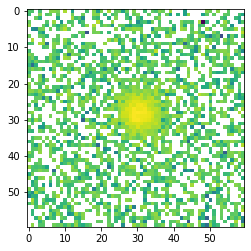

140/1680


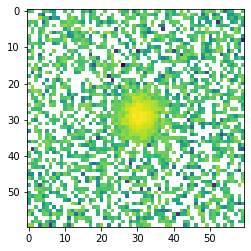

160/1680


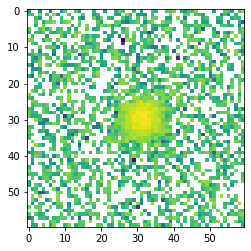

180/1680


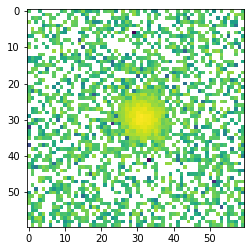

200/1680


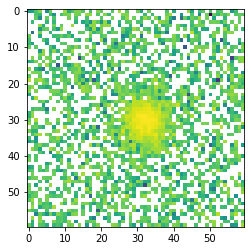

220/1680


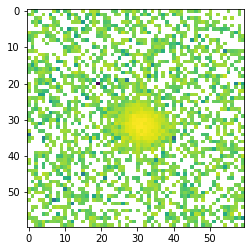

240/1680


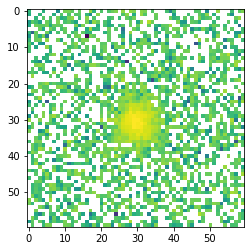

260/1680


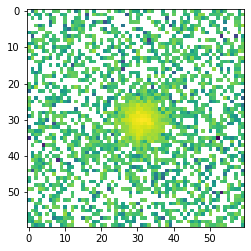

280/1680


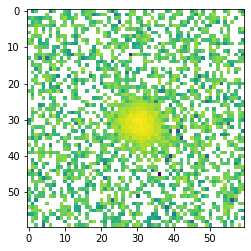

300/1680


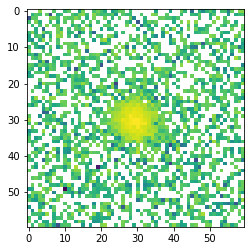

320/1680


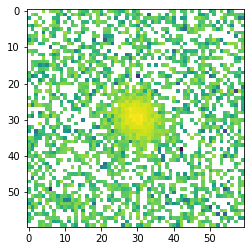

340/1680


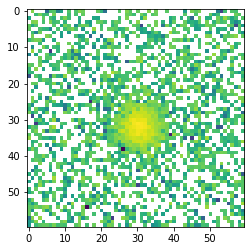

360/1680


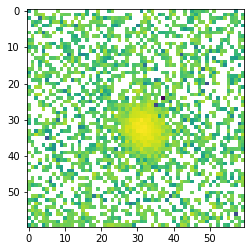

380/1680


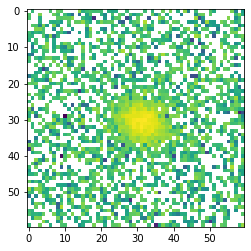

400/1680


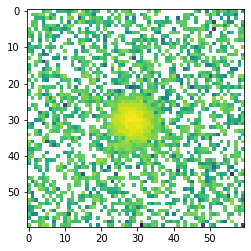

420/1680


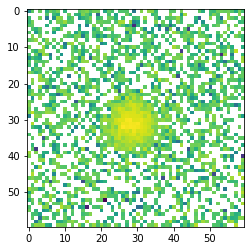

440/1680


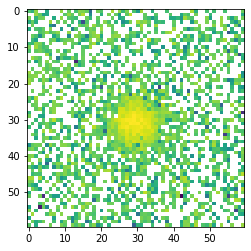

460/1680


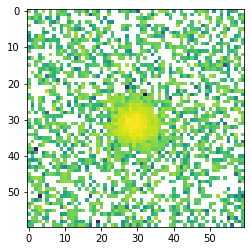

480/1680


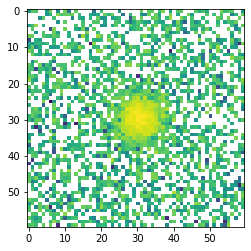

500/1680


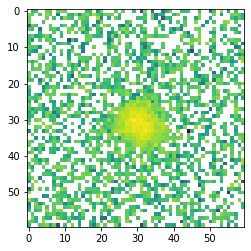

520/1680


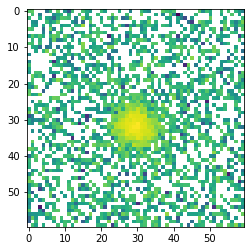

540/1680


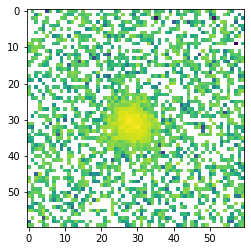

560/1680


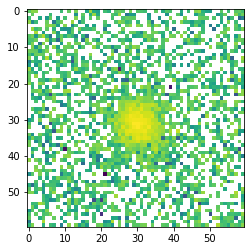

580/1680


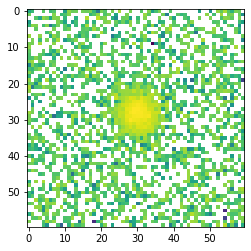

600/1680


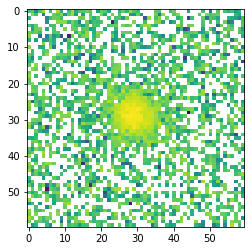

620/1680


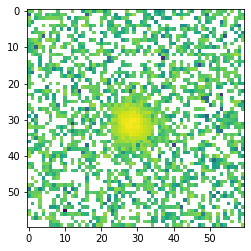

640/1680


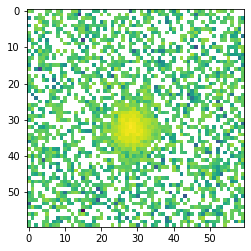

660/1680


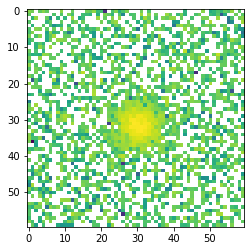

680/1680


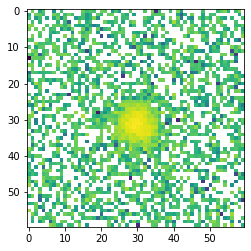

700/1680


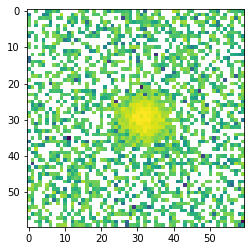

720/1680


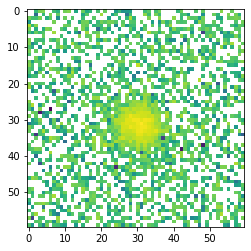

740/1680


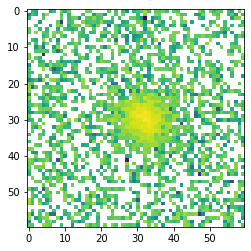

760/1680


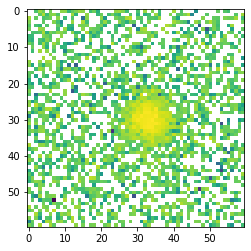

780/1680


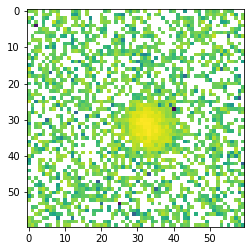

800/1680


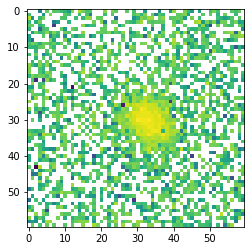

820/1680


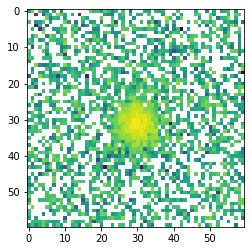

840/1680


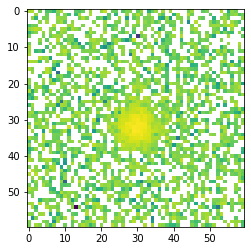

860/1680


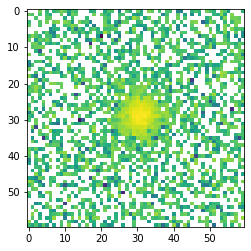

880/1680


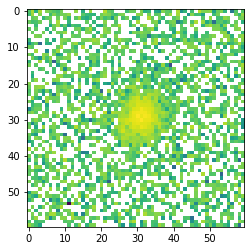

900/1680


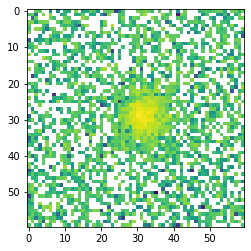

920/1680


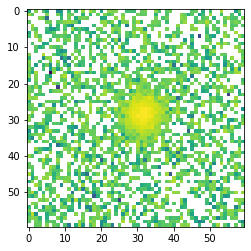

940/1680


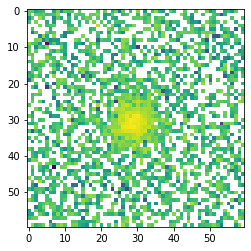

960/1680


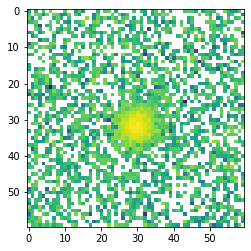

980/1680


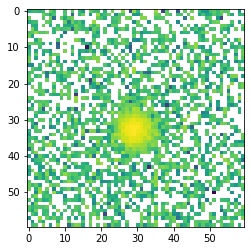

1000/1680


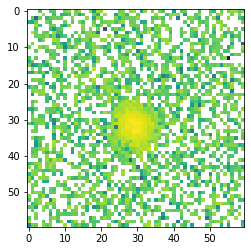

1020/1680


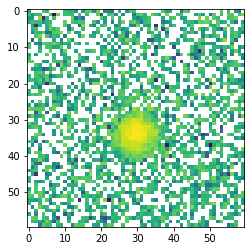

1040/1680


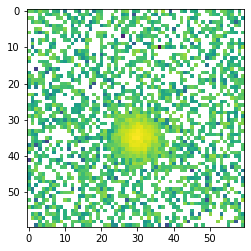

1060/1680


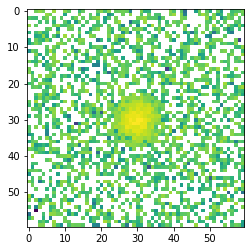

1080/1680


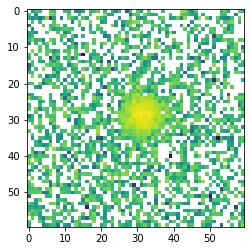

1100/1680


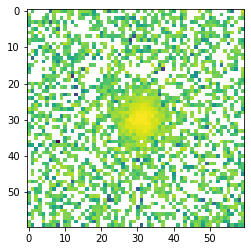

1120/1680


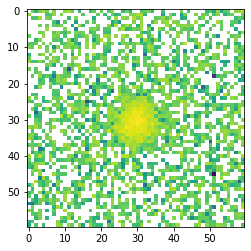

1140/1680


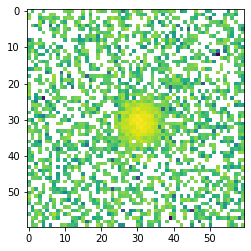

1160/1680


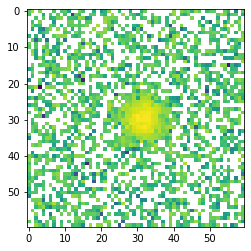

1180/1680


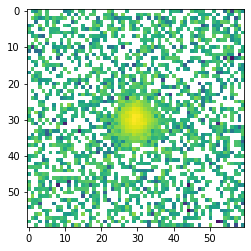

1200/1680


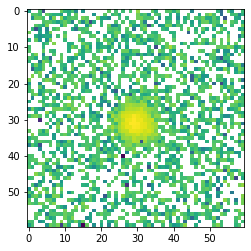

1220/1680


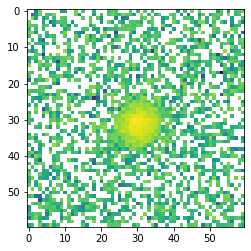

1240/1680


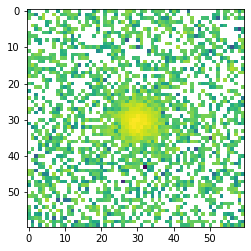

1260/1680


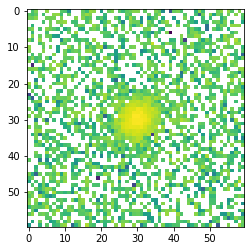

1280/1680


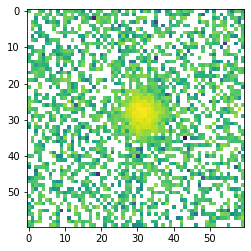

1300/1680


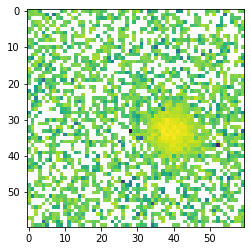

1320/1680


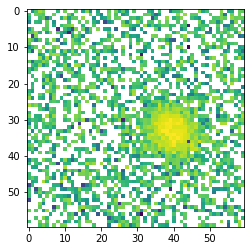

1340/1680


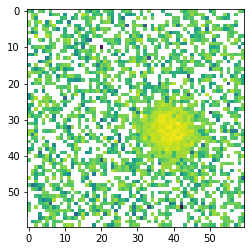

1360/1680


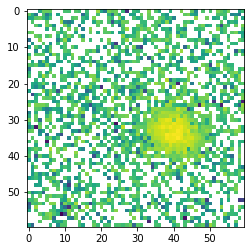

1380/1680


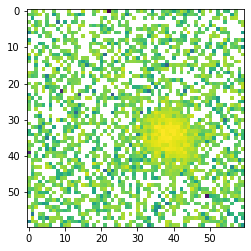

1400/1680


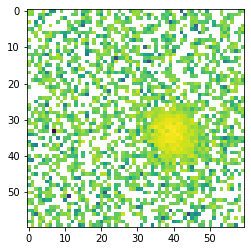

1420/1680


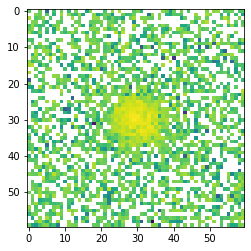

1440/1680


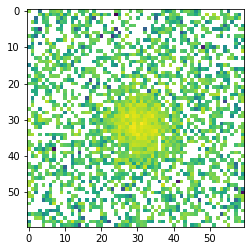

1460/1680


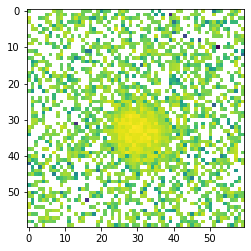

1480/1680


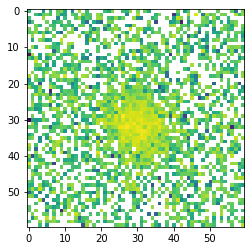

1500/1680


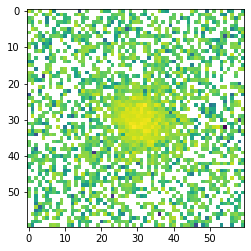

1520/1680


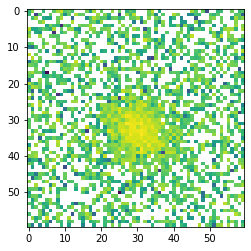

1540/1680


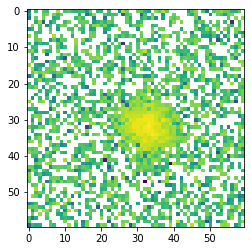

1560/1680


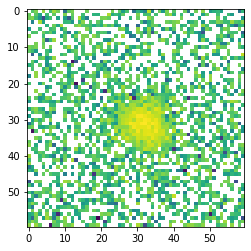

1580/1680


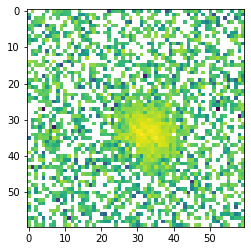

1600/1680


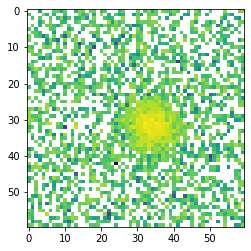

1620/1680


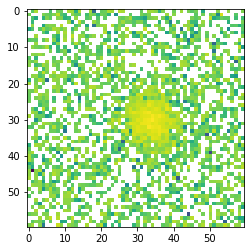

1640/1680


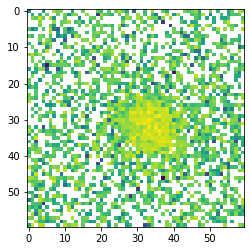

1660/1680


In [80]:
see_movie = True

if see_movie:
    movie= d_movie["movie"]
    show_movie_sum(movie)